## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from seaborn import plt
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

%matplotlib inline

In [2]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
spam_data.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0.00,0,0,0.00,0,0.00,0.00,0,0,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


In [4]:
# at the first glance, we can see that certain words appear more frequently in the spams. 
spam_data.groupby('is_spam').mean()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
is_spam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.073479,0.244466,0.200581,0.000886,0.181040,0.044544,0.009383,0.038415,0.038049,0.167170,0.021711,0.536324,0.061664,0.042403,0.008318,0.073587,0.048346,0.097292,1.270341,0.007579,0.438702,0.045226,0.007088,0.017138,0.895473,0.431994,1.265265,0.193806,0.162794,0.165854,0.106033,0.077306,0.150986,0.077787,0.169455,0.141671,0.197744,0.018723,0.121679,0.083117,0.072027,0.216808,0.070581,0.126636,0.415760,0.287184,0.008192,0.051227,0.050281,0.158578,0.022684,0.109984,0.011648,0.021713,2.377301,18.214491,161.470947
1,0.152339,0.164650,0.403795,0.164672,0.513955,0.174876,0.275405,0.208141,0.170061,0.350507,0.118434,0.549972,0.143547,0.083574,0.112079,0.518362,0.287507,0.319228,2.264539,0.205521,1.380370,0.238036,0.247055,0.212879,0.017479,0.009173,0.001550,0.018798,0.000684,0.005968,0.001274,0.000518,0.014562,0.001776,0.006928,0.029515,0.043469,0.004710,0.012427,0.036718,0.000055,0.002443,0.008450,0.006244,0.125091,0.014727,0.001219,0.002101,0.020573,0.108970,0.008199,0.513713,0.174478,0.078877,9.519165,104.393271,470.619415


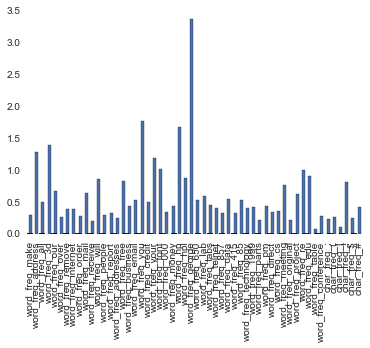

In [5]:
#plot the words freq count, George, you and HP appear more often than others in the non-spam emails. 
df=spam_data.describe()
df_counts=df.ix[2]
df_counts[:54].plot(kind='bar')

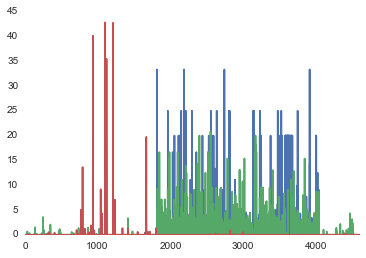

In [6]:
#plot the pattern for the most common words
spam_data['word_freq_george'].plot()
spam_data['word_freq_hp'].plot()
spam_data['word_freq_3d'].plot()


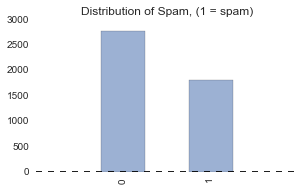

In [7]:
#plot number of spam vs.non-spam
fig = plt.figure(figsize=(16,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

ax1 = plt.subplot2grid((2,3),(0,0))            
spam_data.is_spam.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax1.set_xlim(-1, 2)
plt.title("Distribution of Spam, (1 = spam)")



In [9]:
# show the correlations among features
spam_data.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,-0.024349,0.134072,0.188155,-0.072504,-0.061686,-0.066424,-0.048680,-0.041251,-0.052799,-0.039066,-0.032058,-0.041014,-0.027690,-0.044954,-0.054673,-0.057312,-0.007960,-0.011134,-0.036095,-0.009703,-0.026070,-0.024292,-0.022116,-0.037105,-0.034056,-0.000953,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,-0.006864,-0.040398,-0.018858,-0.009206,0.005330,-0.009117,-0.018370,0.033500,-0.055476,-0.015806,-0.018191,-0.008850,-0.020502,0.001984,-0.043483,-0.038211,-0.030307,-0.029221,-0.021940,-0.027508,-0.018097,-0.003326,-0.024903,-0.004303,-0.024058,-0.028198,-0.024013,-0.008922,-0.019124,-0.014821,-0.015420,-0.025177,-0.002370,-0.019739,-0.016418,-0.023858,-0.009818,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,-0.035681,0.123671,0.041145,-0.087924,-0.062459,-0.108886,-0.050648,-0.057726,-0.032547,-0.038927,-0.061870,-0.054759,-0.061706,-0.048335,-0.046504,-0.067015,0.032407,-0.014809,-0.047066,-0.030956,-0.005811,-0.044325,-0.053464,-0.050664,-0.056655,0.029339,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,-0.012976,-0.019221,-0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,-0.010834,-0.005381,0.008176,0.028102,0.011368,0.035360,-0.015181,-0.013708,-0.010684,-0.010368,-0.007798,-0.010476,-0.007529,-0.006717,-0.008075,-0.006729,-0.006122,-0.006515,-0.007761,-0.002669,-0.004602,-0.007643,-0.005670,-0.008095,-0.009268,-0.005933,-0.012957,-0.009181,-0.003348,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,-0.020207,0.070037,0.000039,-0.072502,-0.075456,-0.088011,-0.061501,0.032048,-0.052066,-0.042535,-0.026748,-0.031998,-0.026960,-0.049732,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115041,-0.048879,0.015234,-0.042336,-0.077986,-0.026900,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,0.053900,0.009264,0.077631,0.009673,0.173066,0.019865,0.064137,0.078350,0.095505,0.058979,0.106833,0.007956,0.211455,0

In [11]:
#pairplot for most features

pairplot_df=spam_data.groupby('is_spam').mean()


###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import svm

In [13]:
#Split data for the logistici model
X=spam_data[['capital_run_length_longest']].values
y=spam_data['is_spam'].values

X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=12)

In [14]:
# a simple logitistic model with only one feature: captial_run_length_lognest. This is not a good model since we can see the R-sq is very low.
logit_1_smf=smf.Logit(y_train, X_train).fit()
logit_1_smf.summary()

Optimization terminated successfully.
         Current function value: 0.658757
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3450
Model:                          Logit   Df Residuals:                     3449
Method:                           MLE   Df Model:                            0
Date:                Thu, 12 Mar 2015   Pseudo R-squ.:                 0.02220
Time:                        18:21:37   Log-Likelihood:                -2272.7
converged:                       True   LL-Null:                       -2324.3
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0072      0.001     10.858      0.000         0.006     0.009
==============================================================================
"""

In [15]:
# Use sklearn package to analyze the logitistic model
logit_sk=LogisticRegression()
logit_sk.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [16]:
y_pred=logit_sk.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)

array([[668,  56],
       [248, 179]])

In [18]:
# run score to prove that he accuracy of the model is low
logit_sk.score(X_test, y_test)

0.73588184187662897

In [19]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.73      0.92      0.81       724
          1       0.76      0.42      0.54       427

avg / total       0.74      0.74      0.71      1151



### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import svm

In [23]:
X=spam_data[spam_data.columns[:57]].values
y=spam_data['is_spam'].values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=12)

In [24]:
logit_1_sk=LogisticRegression()
logit_1_sk.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [25]:
y_pred=logit_1_sk.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[813,  42],
       [ 52, 474]])

In [27]:
print classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.94      0.95      0.95       855
          1       0.92      0.90      0.91       526

avg / total       0.93      0.93      0.93      1381



In [28]:
logit_1_sk.score(X_test,y_test)

0.93193338160753081

In [37]:
# Use statsmodels to show the R-square and coef
logit_1_smf = smf.Logit(y_train, X_train)
logit_fit = logit_1_smf.fit()
logit_fit.summary()


Optimization terminated successfully.
         Current function value: 0.206731
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3220
Model:                          Logit   Df Residuals:                     3163
Method:                           MLE   Df Model:                           56
Date:                Thu, 12 Mar 2015   Pseudo R-squ.:                  0.6928
Time:                        18:35:21   Log-Likelihood:                -665.67
converged:                       True   LL-Null:                       -2166.7
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.6916      0.275     -2.511      0.012        -1.231    -0.152
x2            -0.2482      0.081     -3.056      0.002        -0.407    -0.089
x3            -0.1582      0.131     -1.212      0.226        -0.414     0.098
x4             2.1381      1.382      1.547      0.122        -0.571     4.847
x5             0.6320      0.137      4.610      0.000         0.363     0.901
x6             0.4819      0.270      1.787      0.074        -0.047     1.010
x7             1.8561      0.359      5.163      0.000         1.152     2.561
x8             0.1306      0.178      0.734      0.463        -0.218     0.479
x9             0.3066      0.316      0.970      0.332        -0.313     0.926
x10            0.2851      0.121      2.353      0.019         0.048     0.523
x11            0.1376      0.357      0.386      0.700        -0.562     0.837
x12           -0.4118      0.089     -4.652      0.000        -0.585    -0.238
x13           -0.3343      0.269     -1.244      0.213        -0.861     0.192
x14           -0.0309      0.215     -0.144      0.886        -0.453     0.391
x15            0.8323      0.729      1.141      0.254        -0.597     2.262
x16            0.7546      0.166      4.544      0.000         0.429     1.080
x17            0.8077      0.276      2.925      0.003         0.266     1.349
x18           -0.0139      0.124     -0.113      0.910        -0.256     0.228
x19           -0.0846      0.039     -2.152      0.031        -0.162    -0.008
x20            0.7856      0.538      1.461      0.144        -0.268     1.840
x21            0.2016      0.065      3.089      0.002         0.074     0.330
x22            0.3534      0.298      1.185      0.236        -0.231     0.938
x23            2.1372      0.557      3.836      0.000         1.045     3.229
x24            0.2140      0.151      1.416      0.157        -0.082     0.510
x25           -2.8178      0.480     -5.865      0.000        -3.759    -1.876
x26           -0.9252      0.553     -1.673      0.094        -2.009     0.159
x27           -7.7470      1.735     -4.465      0.000       -11.148    -4.346
x28            0.3064      0.232      1.321      0.186        -0.148     0.761
x29           -7.6650      4.723     -1.623      0.105       -16.921     1.591
x30           -0.9011      0.516     -1.746      0.081        -1.913     0.110
x31           -0.3275      0.593     -0.552      0.581        -1.489     0.834
x32            3.3566      4.660      0.720      0.471        -5.777    12.490
x33           -0.8888      0.333     -2.667      0.008        -1.542    -0.236
x34           -1.6268      5.623     -0.289      0.772       -12.649     9.395
x35           -1.9594      1.185     -1.654      0.098        -4.281     0.362
x36            0.4831      0.380      1.271      0.204        -0.262     1.228
x37           -0.0752      0.214     -0.351      0.726        -0.495     0.345
x38           -0.8269      0.675     -1.225      0.221        -2.150     0.496
x3

###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

In [38]:
from sklearn.cross_validation import cross_val_score
from scipy.stats import sem

In [39]:
from sklearn.cross_validation import cross_val_score    
scores = cross_val_score(logit_1_sk, X_test, y_test, cv=5)
print scores

[ 0.92057762  0.93478261  0.9057971   0.91304348  0.93115942]


### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [40]:
from sklearn import neighbors

knn_sk = neighbors.KNeighborsClassifier(3, weights='uniform')
knn_sk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [41]:
# run the basic KNN model, the score is not as highter as the logit_1_sk model. 
knn_sk.score(X_test, y_test)

0.78276611151339603

In [42]:
from sklearn.preprocessing import StandardScaler

features_scalar = StandardScaler()

In [43]:
X_train_scaled = features_scalar.fit_transform(X_train)
knn_scaled = neighbors.KNeighborsClassifier(3, weights='uniform')
knn_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [44]:
# run the KNN after scaling the data, the score is much higher, but still lower than the logit_1_sk's. 
X_test_scaled = features_scalar.transform(X_test)

knn_scaled.score(X_test_scaled, y_test)

0.89790007241129621

### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [45]:
# By examing the co-ef values from the logit_1_smf results, and eliminate those low co-ef features and run another logitistic model. 
# This model has 20 features. 

X=spam_data[['word_freq_3d','word_freq_3d','word_freq_remove','word_freq_000','word_freq_hp','word_freq_george','word_freq_lab','word_freq_857','word_freq_415','word_freq_85','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','capital_run_length_total']].values
y=spam_data['is_spam'].values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=12)

In [46]:
logit_2_sk=LogisticRegression()
logit_2_sk.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [47]:
y_pred=logit_2_sk.predict(X_test)

In [48]:
confusion_matrix(y_test,y_pred)

array([[798,  57],
       [118, 408]])

In [49]:
print classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.87      0.93      0.90       855
          1       0.88      0.78      0.82       526

avg / total       0.87      0.87      0.87      1381



In [50]:
# the score of model is much lower than the first one
logit_2_sk.score(X_test,y_test)

0.87328023171614777

In [51]:
from sklearn.svm import LinearSVC


In [52]:
X.shape

(4601, 19)

In [53]:
#After applying the tranform method to the data set, features have been reduced from 57 to 11. 

X_new = LinearSVC(C=0.01, penalty="l1", dual=False).fit_transform(X, y)
X_new.shape

(4601, 12)

In [54]:
# run another logistic model with only 17 features
X=spam_data[['word_freq_3d','word_freq_remove','word_freq_000','word_freq_hp','word_freq_george','word_freq_lab','word_freq_857','word_freq_415','word_freq_85','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','capital_run_length_longest']].values
y=spam_data['is_spam'].values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=12)

In [55]:
logit_3_sk=LogisticRegression()
logit_3_sk.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [42]:
y_pred=logit_3_sk.predict(X_test)

In [56]:
print classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.87      0.93      0.90       855
          1       0.88      0.78      0.82       526

avg / total       0.87      0.87      0.87      1381



In [57]:
# Compare the score of logit_3_sk and logit_2_sk, the logit_3_sk with less features has a slight higher score. 

logit_3_sk.score(X_test,y_test)

0.8790731354091238

In [58]:
# Evaluate the feature weights
X=spam_data[spam_data.columns[:57]].values
y=spam_data['is_spam'].values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=12)

In [59]:
feature_names = spam_data.columns[:57]


In [60]:
target_names = spam_data['is_spam']

In [61]:
feature_weights = logit_1_sk.coef_


In [ ]:
# Based on two reduced features models, the logit_1_sk has the highest score, therefore it is the choice. 

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [62]:
# build a dataframe to show actual spam vs. predicted spam
spam_data_df=spam_data[spam_data.columns[:57]]

In [63]:
y_pred=logit_1_sk.predict(spam_data_df)
y_pred


array([1, 1, 1, ..., 0, 0, 0])

In [64]:
actual=y


In [65]:
pred_df=pd.DataFrame(actual, columns = ['actual'])
pred_df['predicted']=y_pred
pred_df.head(5)

,actual,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [53]:
#calculate number of times when it predicts the emails as spam 
pred_df_is_spam=pred_df.loc[pred_df['actual']==1]
predicted_as_spam = float(sum(pred_df_is_spam.predicted))/len(pred_df_is_spam.predicted)
predicted_as_spam

0.8963044677330392

In [66]:
#calculate number of times when it predicts the emails as non spam
pred_df_not_spam=pred_df.loc[pred_df['actual']==0]
predicted_as_not_spam = float(sum(pred_df_not_spam.predicted))/len(pred_df_not_spam.predicted)
predicted_as_not_spam=1-predicted_as_not_spam
predicted_as_not_spam

0.9501434720229556

In [67]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [68]:
# Binarize the output
y = label_binarize(y, classes=[0,1,2])
n_classes = y.shape[1]

In [54]:
y

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ..., 
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [61]:
n_classes

3

In [69]:
# Use the logit classifier
logit_1_sk=LogisticRegression()
y_score = logit_1_sk.fit(X_train, y_train).decision_function(X_test)


In [63]:
y_score

array([ 10.70549239,  -6.27410932, -52.64791422, ...,   5.52333567,
         5.31742408, -10.09681862])

In [70]:
y_test

array([1, 0, 0, ..., 1, 1, 0])

In [71]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

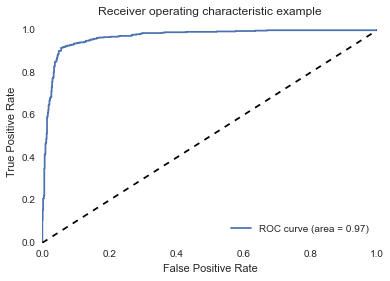

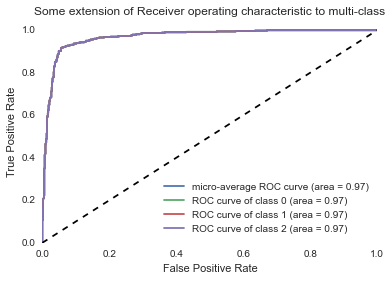

In [72]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [73]:
X=spam_data[spam_data.columns[:57]].values
y=spam_data['is_spam'].values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=12)

In [74]:
y_pred_proba_70 = logit_1_sk.predict(X_test) > 0.7
y_pred_proba_70

array([ True, False, False, ...,  True,  True, False], dtype=bool)

In [75]:
y_pred_proba_30 = logit_1_sk.predict(X_test) >0.3
y_pred_proba_30

array([ True, False, False, ...,  True,  True, False], dtype=bool)

In [76]:
y_pred_proba_70_df=pd.DataFrame(y_pred_proba_70[:20],columns=['y_pred_proba_70'])
y_pred_proba_30_df=pd.DataFrame(y_pred_proba_30[:20],columns=['y_pred_proba_30'])

In [77]:
#
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
# fit estimator
est = GradientBoostingClassifier(n_estimators=500, max_depth=3)
est.fit(X_train, y_train)


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2, n_estimators=500,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [80]:
# predict class labels
pred = est.predict(X_test) 
acc = est.score(X_test, y_test)
print('ACC: %.4f' % acc)

ACC: 0.9544


In [81]:
# predict class probabilities
est.predict_proba(X_test)[50]

array([ 0.00134777,  0.99865223])

In [82]:
# predict class probabilities
est.predict_proba(X_test)[30]

array([ 0.00158249,  0.99841751])

In [83]:
# predict class probabilities
est.predict_proba(X_test)[70]

array([ 0.01017673,  0.98982327])

###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

In [84]:
#your discussion here
Look like if the predict_probablity is lower than 50%, the accuracy is higher. 


SyntaxError: invalid syntax (<ipython-input-84-d4e75d24361e>, line 2)

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X_train)

PCA(copy=True, n_components=2, whiten=True)

In [86]:
pca.components_

array([[  9.97329815e-08,  -9.15805395e-08,   1.39768512e-07,
          1.40555770e-07,   3.95547933e-08,   8.68242244e-08,
          1.70407928e-09,   7.39644980e-08,   2.52559105e-07,
          2.42956093e-07,   8.34058133e-08,   8.75117221e-08,
          1.16130732e-07,   1.98284359e-07,   1.60315076e-07,
          1.69285840e-08,   1.00041089e-07,   9.70141464e-08,
          7.40901396e-08,   1.42971990e-07,   2.65398660e-07,
          3.58831361e-07,   2.10044135e-07,   1.43256287e-07,
         -2.60487864e-07,  -1.80787122e-07,  -1.18727307e-06,
         -1.15077123e-07,  -1.14489402e-07,  -1.03295902e-07,
         -6.29377293e-08,  -5.39718532e-08,  -5.41598253e-09,
         -5.16537536e-08,  -8.60010270e-08,  -6.10725656e-08,
         -4.08623331e-09,  -6.34297754e-09,  -6.64213026e-08,
         -3.35270197e-08,  -3.03727801e-08,  -1.26402885e-07,
         -2.43999673e-08,  -8.63073210e-08,  -3.11581550e-07,
         -1.41385007e-07,  -3.13362797e-10,  -1.81529331e-08,
        

In [87]:
pca.explained_variance_ratio_

array([ 0.90959064,  0.08844654])

In [88]:
pca.explained_variance_ratio_.sum()

0.99803718051787005

In [89]:
# Transform the Data into Princial Component vectors
X_pca = pca.transform(X_train)

In [90]:
import numpy as np
np.round(X_pca.mean(axis=0), decimals=5)

array([ 0., -0.])

In [91]:
#your visualization here
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

In [93]:
plot_PCA_2D(X_pca, y, ['0','1'])

IndexError: index 3220 is out of bounds for axis 0 with size 3220